In [2]:
import wfdb
from wfdb import processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
PATH = "apnea-ecg-database-1.0.0/"
SAMPTO = 2000

In [21]:
record_ecg = wfdb.rdrecord(PATH + "a01", sampto=SAMPTO)
annotation = wfdb.rdann(PATH+ "a01", 'qrs', sampto=SAMPTO, shift_samps=True)
breath = wfdb.rdrecord(PATH + "a01er", sampto=SAMPTO)


df2 = record_ecg.to_dataframe()
df2['time'] = df2.index.microseconds / 1000 + df2.index.seconds * 1000
df2 = df2[['time', 'ECG']]
df2.reset_index(drop=True, inplace=True)
df2.head()

df_breath = breath.to_dataframe()
df_breath['time'] = df_breath.index.microseconds / 1000 + df_breath.index.seconds * 1000
# df_breath = df_breath[['time', 'breath']]
# df_breath.reset_index(drop=True, inplace=True)
df_breath.head()

,ECG,Resp C,Resp A,Resp N,SpO2,time
0 days 00:00:00,-0.060,-0.1015,-0.3446,0.23545,98.0,0.0
0 days 00:00:00.010000,-0.065,-0.1025,-0.3455,0.23640,98.0,10.0
0 days 00:00:00.020000,-0.060,-0.1035,-0.3464,0.23735,98.0,20.0
0 days 00:00:00.030000,-0.075,-0.1045,-0.3473,0.23830,98.0,30.0
0 days 00:00:00.040000,-0.065,-0.1055,-0.3482,0.23925,98.0,40.0


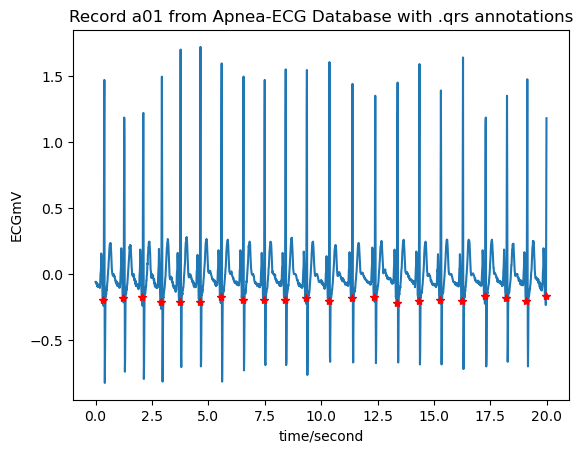

In [4]:
wfdb.plot_wfdb(record=record_ecg, annotation=annotation,
               title='Record a01 from Apnea-ECG Database with .qrs annotations',
               time_units='seconds')

[  34  123  207  290  373  461  554  652  746  839  932 1033 1135 1236
 1335 1432 1527 1625 1725 1820 1910 1995]
[ 89.  84.  83.  83.  88.  93.  98.  94.  93.  93. 101. 102. 101.  99.
  97.  95.  98. 100.  95.  90.  85.]


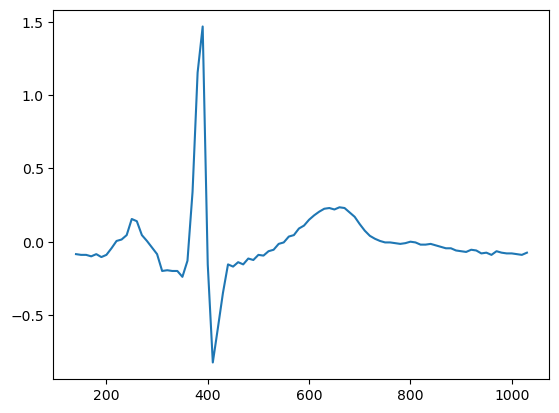

In [7]:
#przetwarzanie danych timeeeeeeee
print(annotation.sample)
num_of_beats = annotation.sample.size - 1
offset_l = 20
offset_r = 70

temp = np.zeros(num_of_beats)

for beat in range(num_of_beats):
    temp[beat] = annotation.sample[beat+1] - annotation.sample[beat]
print(temp)

#test czy to pojedyncze bicie

plt.plot(df2['time'][34 - offset_l:34+offset_r], df2['ECG'][34 - offset_l:34 + offset_r])

In [9]:
beats = np.zeros((num_of_beats, offset_l+offset_r))

for beat in range(num_of_beats):
    start_pos = annotation.sample[beat]
    beats[beat] = df2['ECG'][start_pos-offset_l:start_pos+offset_r]


In [26]:
#jakas zabawa
# qrs_inds = processing.qrs.gqrs_detect(sig=record_ecg.p_signal[:,0], fs=200)
# qrs_inds = (1 / record_ecg.fs) * qrs_inds
# # print(qrs_inds.size)
# # Utwórz nowy wykres i oś
# signal = record_ecg.p_signal[:, 0]
# time = (1 / record_ecg.fs) * np.arange(len(signal))

# # Utwórz nowy wykres
# fig, ax = plt.subplots()

# # Wyświetl sygnał EKG na wykresie
# ax.plot(time, signal)

# # Wygeneruj i wyrysuj dodatkowe punkty na tym samym wykresie
# ax.plot(qrs_inds, np.zeros(qrs_inds.size), 'ro')  # 'ro' oznacza czerwone kropki

# # Wyświetl wykres z dodatkowymi punktami i etykietami
# plt.show()

In [10]:
scaler = StandardScaler()
scaler.fit(beats)
X_scaled = scaler.transform(beats)

In [11]:
pca = decomposition.PCA(n_components=4)
X_transformed = pca.fit_transform(X_scaled)

In [12]:
eigen_vectors = pca.components_
eigen_values = pca.explained_variance_
print(eigen_vectors)
print(eigen_values)

[[-0.04250292 -0.10697113 -0.05242977 -0.11065764 -0.05225675 -0.10648988
  -0.10466251 -0.11057322 -0.11665293 -0.08435205 -0.08818338  0.04331701
   0.06626734  0.06519259  0.00318615 -0.02568468  0.03818983 -0.08205287
  -0.05868231 -0.10939403 -0.0089061  -0.09156874 -0.07815393 -0.06751864
  -0.05307071  0.07061243  0.07016229 -0.11298692 -0.10896183 -0.10400362
  -0.06131862 -0.10150893 -0.05563936 -0.09198195 -0.01022    -0.09891179
  -0.02699321 -0.09301215 -0.0580362  -0.0642916  -0.06807549 -0.07682379
  -0.03320488 -0.06259445 -0.063372   -0.01816138 -0.02002998 -0.05613519
  -0.04515489 -0.03077144 -0.00044702 -0.03914009 -0.06514261 -0.0410016
  -0.05824317 -0.06223774 -0.03744264 -0.08551529 -0.07804641 -0.12726341
  -0.10092561 -0.14698908 -0.1451706  -0.16635129 -0.1531156  -0.15551704
  -0.16848714 -0.14388834 -0.15432943 -0.15918654 -0.16028073 -0.14516365
  -0.14012912 -0.14153542 -0.14851052 -0.16322458 -0.1568588  -0.15480646
  -0.15680153 -0.15711843 -0.16424929 -

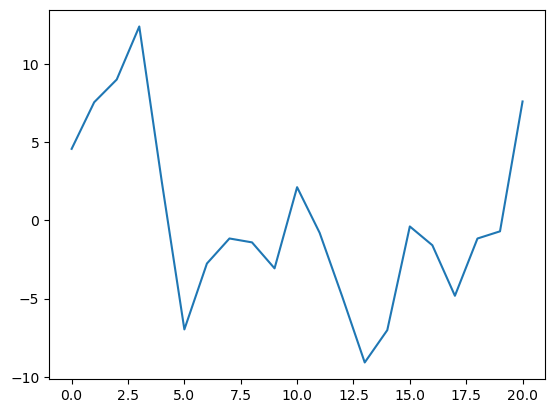

In [14]:
plt.plot(X_transformed[:,0])
# plt.plot(X_transformed[:,1])
# plt.plot(X_transformed[:,2])
# plt.plot(X_transformed[:,3])

In [112]:
record = wfdb.rdrecord(PATH + "a01r", sampto=2000)

df = record.to_dataframe()
df['time'] = df.index.microseconds / 1000 + df.index.seconds * 1000
df = df[['time', 'Resp C', 'Resp A', 'Resp N']]
df.reset_index(drop=True, inplace=True)
df.head()

,"RESP,","PLETH,","V,","AVR,","II,",time
0 days 00:00:00,0.353862,0.435971,0.525483,0.303932,0.725477,0.0
0 days 00:00:00.008000,0.356792,0.432064,0.519606,0.335289,0.670597,8.0
0 days 00:00:00.016000,0.358745,0.428150,0.515688,0.374521,0.609809,16.0
0 days 00:00:00.024000,0.361675,0.424244,0.505893,0.419601,0.550979,24.0
0 days 00:00:00.032000,0.363643,0.421307,0.509811,0.449025,0.499986,32.0


In [ ]:
plt.plot(df2['time'], df2['ECG'])
plt.plot(df['time'], df['Resp C'])
plt.plot(df['time'], df['Resp A'])
plt.plot(df['time'], df['Resp N'])